# Assignment 1
## IND320

Sigvard Bratlie \
https://github.com/sigvardbratlie/ind320

**AI-usage**
I have only used AI (Gemini-pro-2.5 to be specific) to code corrections and syntax related questions. \
All main content and logic is self written. One exception was the of st.column_config.LineChartColumn, where I got stuck and got help.



In [6]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
%matplotlib inline

### Read the supplied CSV file using Pandas

In [57]:
df = pd.read_csv("open-meteo-subset.csv")
df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time")

### Print its contents in a relevant way

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2020-01-01 00:00:00 to 2020-12-30 23:00:00
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature_2m (°C)     8760 non-null   float64
 1   precipitation (mm)      8760 non-null   float64
 2   wind_speed_10m (m/s)    8760 non-null   float64
 3   wind_gusts_10m (m/s)    8760 non-null   float64
 4   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 410.6 KB


In [4]:
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),8760.0,-0.394909,6.711903,-19.3,-4.9,-1.0,4.1,19.9
precipitation (mm),8760.0,0.222854,0.493747,0.0,0.0,0.0,0.2,5.8
wind_speed_10m (m/s),8760.0,3.661689,2.253210,0.1,1.8,3.3,5.1,13.6
wind_gusts_10m (m/s),8760.0,8.300719,5.098909,0.2,4.5,7.7,11.5,28.7
wind_direction_10m (°),8760.0,212.209589,91.371980,0.0,128.0,238.0,292.0,360.0


## Plot Data

### Plot each column separately

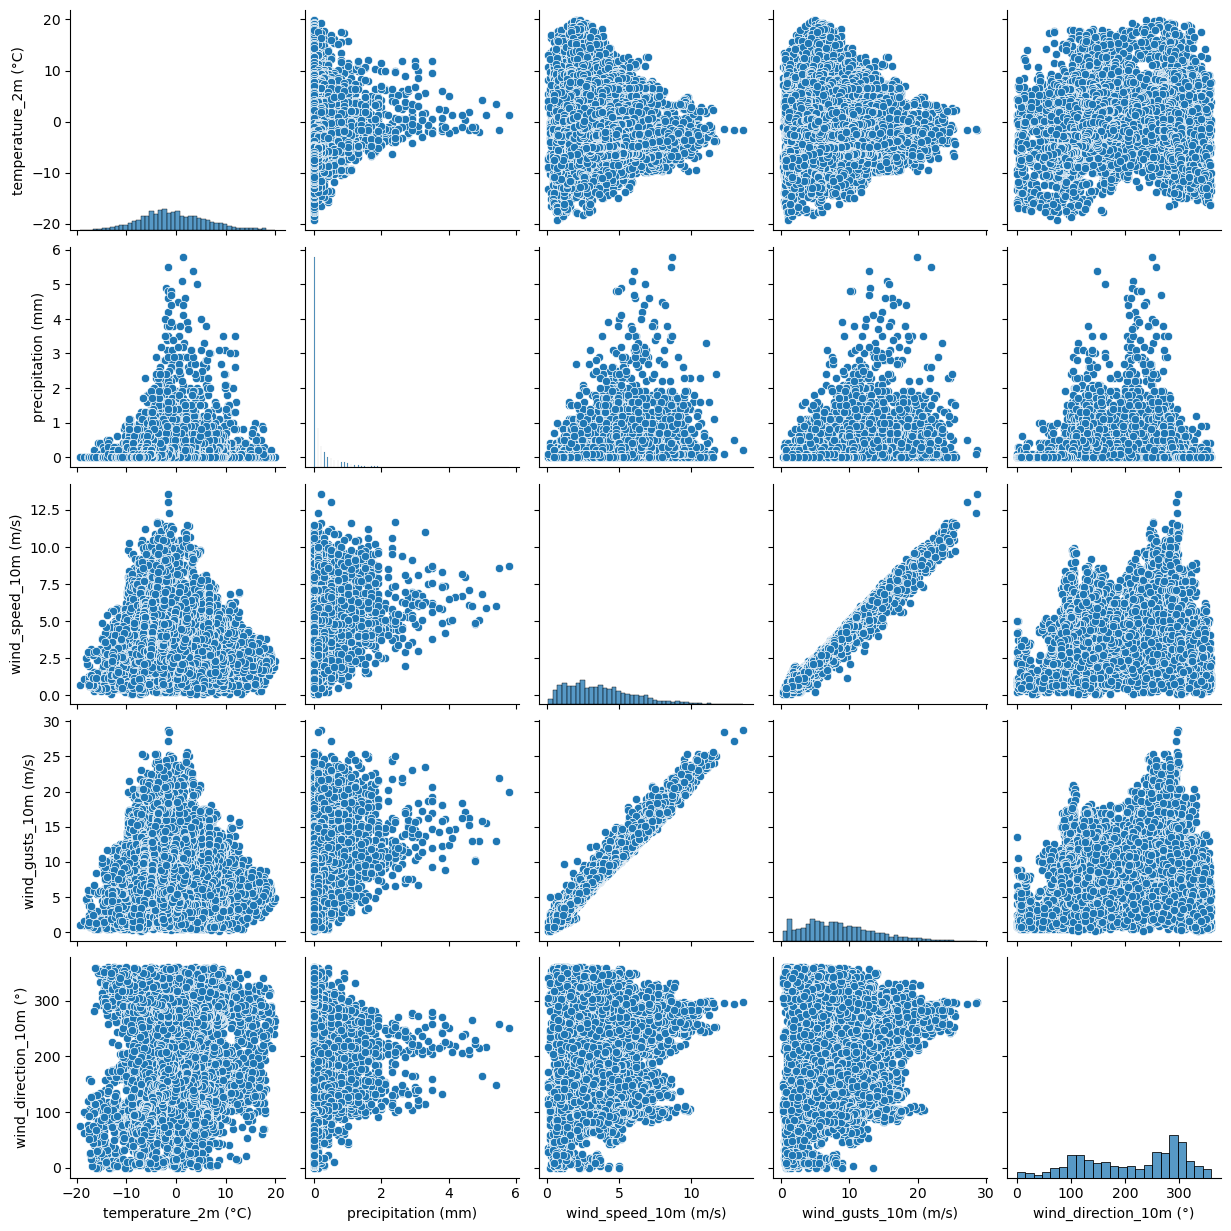

In [60]:
sns.pairplot(df)

ROWS 2 |  COLS 3
ROW / COL (1, 2)


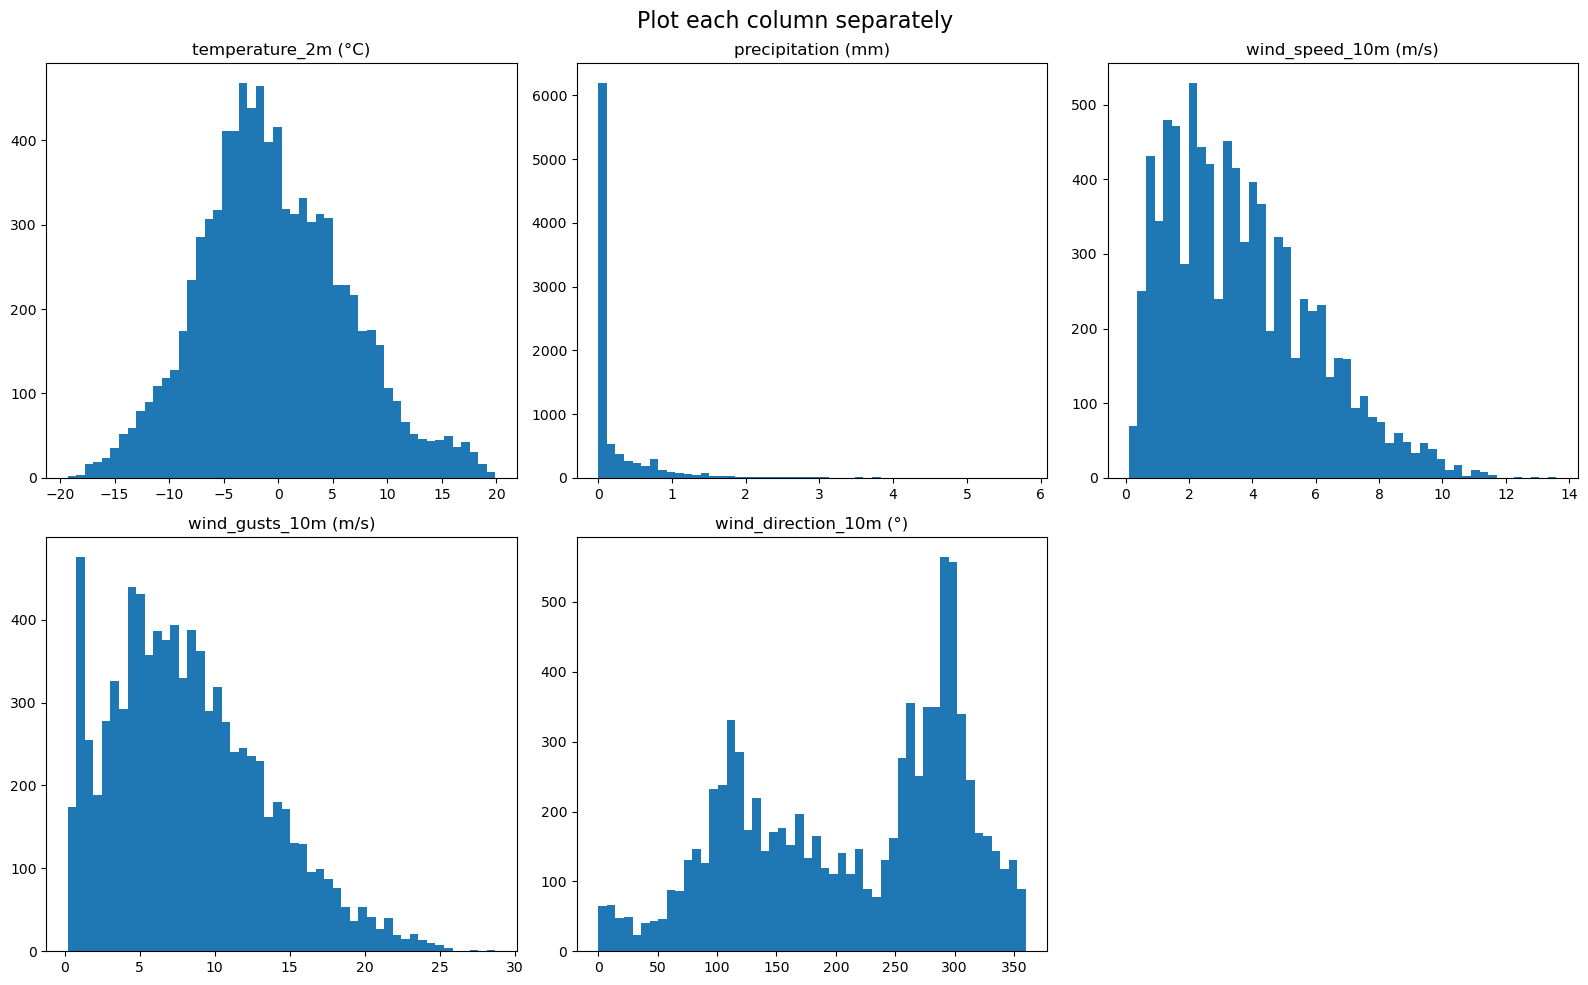

In [127]:
n_cols = 3
n_rows = math.ceil(len(df.columns) / n_cols)
fig, ax = plt.subplots(n_rows,n_cols, figsize = (16,10))
print(f'ROWS {n_rows} |  COLS {n_cols}')

idx = 0
for i in range(n_rows):
    for j in range(n_cols):
        if idx<len(df.columns):
            #print(f'Ploting column {df.columns[idx]} ON ROW {i} and COL {j}. {datetime.now()}')
            ax[i,j].hist(df.iloc[:,idx],bins = 50)
            ax[i,j].set_title((df.columns[idx]))
            idx += 1
        else:
            print(f'ROW / COL {i,j}')
            ax[i,j].axis("off")

plt.suptitle("Plot each column separately",fontsize = 16)
plt.tight_layout()
plt.show()

### Plot all columns together

In [90]:
dfs = (df-df.mean()) / df.std()
dfs.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),8760.0,-3.893385e-17,1.0,-2.816651,-0.671209,-0.090152,0.669692,3.023719
precipitation (mm),8760.0,9.003452e-17,1.0,-0.451352,-0.451352,-0.451352,-0.046287,11.295549
wind_speed_10m (m/s),8760.0,1.070681e-16,1.0,-1.580718,-0.826239,-0.160522,0.638338,4.410735
wind_gusts_10m (m/s),8760.0,2.027805e-17,1.0,-1.588716,-0.745399,-0.117813,0.627444,4.000715
wind_direction_10m (°),8760.0,1.103126e-16,1.0,-2.322480,-0.921613,0.282257,0.873248,1.617459


''

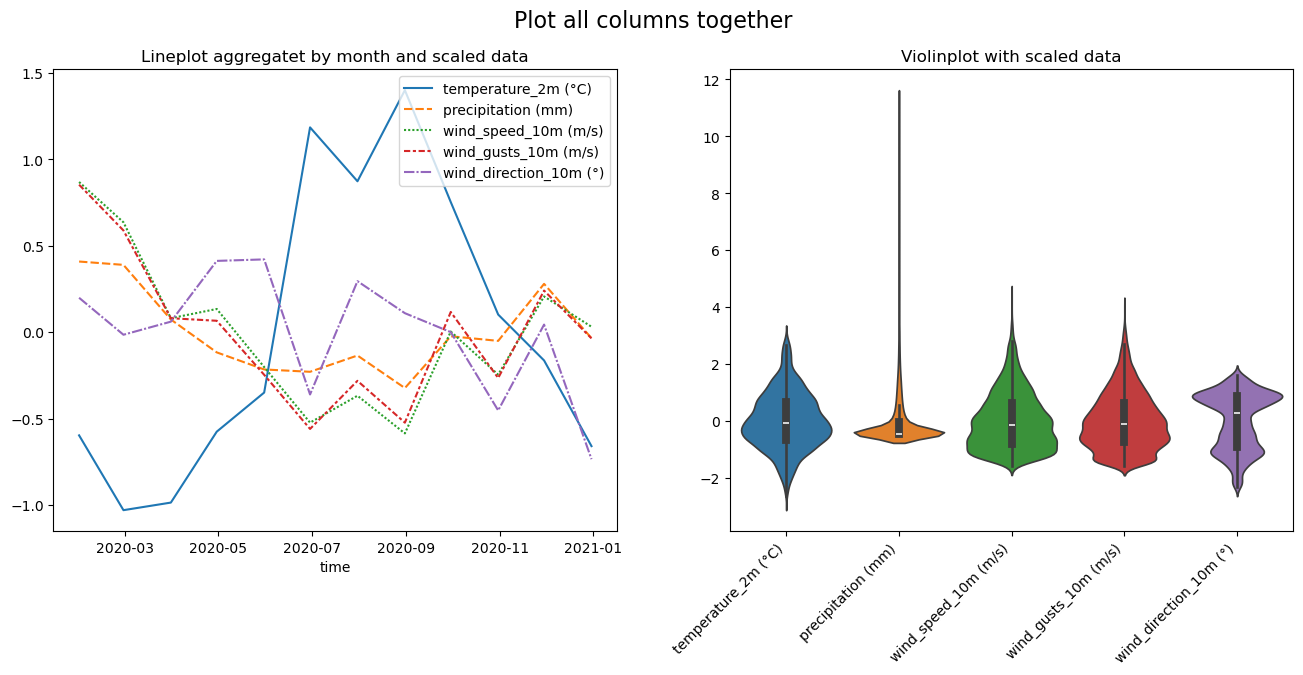

In [103]:
fig,ax = plt.subplots(1,2,figsize = (16,6))
sns.lineplot(data = dfs.resample("ME").mean(),ax = ax[0])
ax[0].set_title("Lineplot aggregatet by month and scaled data")
sns.violinplot(dfs, ax=ax[1])
ax[1].set_title("Violinplot with scaled data")
plt.xticks(rotation = 45, ha= "right")
plt.suptitle("Plot all columns together",fontsize = 16)
;

In [104]:
data_df = pd.DataFrame(
    {
        "sales": [
            [0, 4, 26, 80, 100, 40],
            [80, 20, 80, 35, 40, 100],
            [10, 20, 80, 80, 70, 0],
            [10, 100, 20, 100, 30, 100],
        ],
    }
)

In [105]:
data_df

,sales
0,"[0, 4, 26, 80, 100, 40]"
1,"[80, 20, 80, 35, 40, 100]"
2,"[10, 20, 80, 80, 70, 0]"
3,"[10, 100, 20, 100, 30, 100]"


In [106]:
df.min()

temperature_2m (°C)      -19.3
precipitation (mm)         0.0
wind_speed_10m (m/s)       0.1
wind_gusts_10m (m/s)       0.2
wind_direction_10m (°)     0.0
dtype: float64

In [109]:
df.resample("ME").mean().iloc[0]

temperature_2m (°C)        -4.399059
precipitation (mm)          0.424462
wind_speed_10m (m/s)        5.617876
wind_gusts_10m (m/s)       12.647581
wind_direction_10m (°)    230.373656
Name: 2020-01-31 00:00:00, dtype: float64

In [117]:
fy,fm = df.index.min().year, df.index.min().month
first_month = df.loc[(df.index.year == fy) & df.index.month == fm, :]

In [118]:
first_month

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284
...,...,...,...,...,...
2020-11-30 19:00:00,-1.9,0.0,2.4,5.2,290
2020-11-30 20:00:00,-2.2,0.0,3.1,6.7,304
2020-11-30 21:00:00,-2.0,0.0,3.6,7.7,320


In [120]:
y_min = first_month.min().min(),
y_max=first_month.max().min()
y_max,y_min

(5.8, (-19.3,))

In [126]:
df.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='time')